In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
%matplotlib inline

In [2]:
data = pd.read_csv("IRIS.csv")

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
print(*data.columns, sep = "\n")

sepal_length
sepal_width
petal_length
petal_width
species


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
data.value_counts("species")

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [11]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

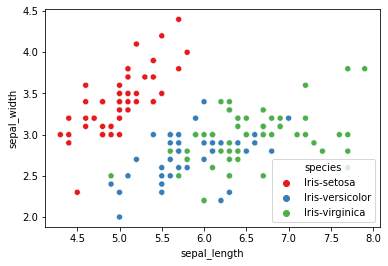

In [12]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=data, palette = 'Set1')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

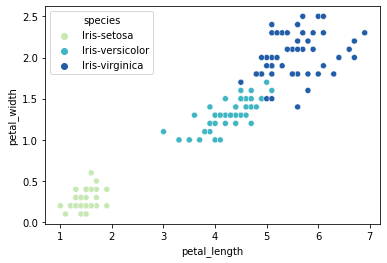

In [13]:
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=data, palette = 'YlGnBu' )

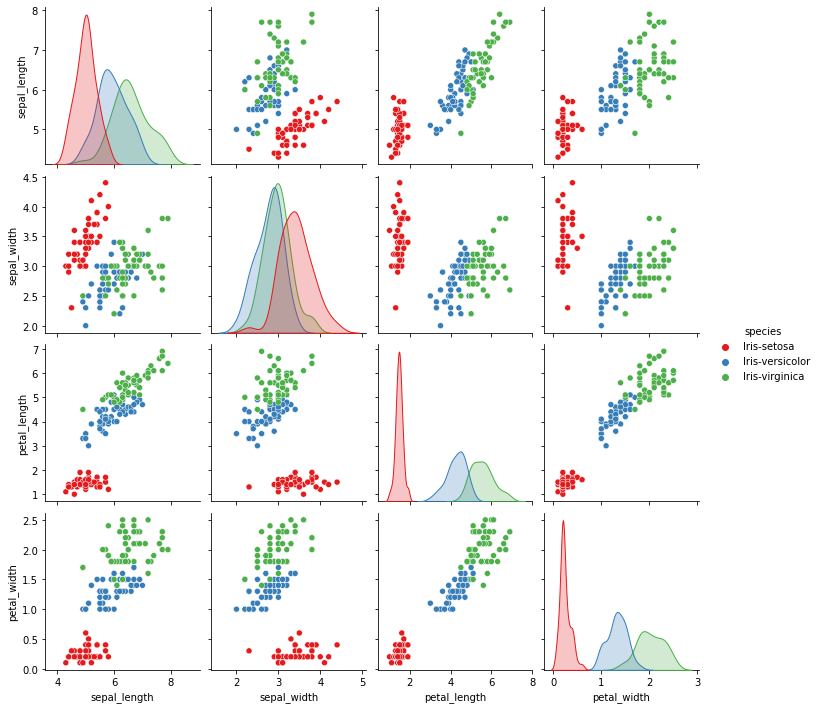

In [14]:
sns.pairplot(data, hue = 'species', palette = 'Set1')

<AxesSubplot:xlabel='species', ylabel='petal_width'>

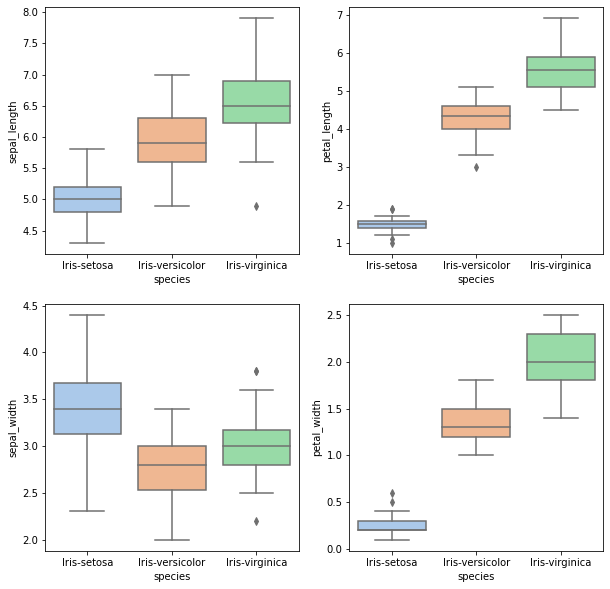

In [15]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(y = 'sepal_length', x = 'species', data = data, palette = 'pastel')

plt.subplot(2,2,2)
sns.boxplot(y = 'petal_length', x = 'species', data = data, palette = 'pastel')

plt.subplot(2,2,3)
sns.boxplot(y = 'sepal_width', x = 'species', data = data, palette = 'pastel')


plt.subplot(2,2,4)
sns.boxplot(y = 'petal_width', x = 'species', data = data, palette = 'pastel')

In [16]:
data = data.sample(frac = 1)

In [17]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
80,5.5,2.4,3.8,1.1,Iris-versicolor
16,5.4,3.9,1.3,0.4,Iris-setosa
116,6.5,3.0,5.5,1.8,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
22,4.6,3.6,1.0,0.2,Iris-setosa
...,...,...,...,...,...
50,7.0,3.2,4.7,1.4,Iris-versicolor
12,4.8,3.0,1.4,0.1,Iris-setosa
108,6.7,2.5,5.8,1.8,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica


In [18]:
label_encoder = preprocessing.LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])

In [19]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
80,5.5,2.4,3.8,1.1,1
16,5.4,3.9,1.3,0.4,0
116,6.5,3.0,5.5,1.8,2
102,7.1,3.0,5.9,2.1,2
22,4.6,3.6,1.0,0.2,0
...,...,...,...,...,...
50,7.0,3.2,4.7,1.4,1
12,4.8,3.0,1.4,0.1,0
108,6.7,2.5,5.8,1.8,2
101,5.8,2.7,5.1,1.9,2


In [20]:
X = data.drop(['species'], axis = 1)
Y = data.species

In [21]:
print(X)

     sepal_length  sepal_width  petal_length  petal_width
80            5.5          2.4           3.8          1.1
16            5.4          3.9           1.3          0.4
116           6.5          3.0           5.5          1.8
102           7.1          3.0           5.9          2.1
22            4.6          3.6           1.0          0.2
..            ...          ...           ...          ...
50            7.0          3.2           4.7          1.4
12            4.8          3.0           1.4          0.1
108           6.7          2.5           5.8          1.8
101           5.8          2.7           5.1          1.9
42            4.4          3.2           1.3          0.2

[150 rows x 4 columns]


In [22]:
print(Y)

80     1
16     0
116    2
102    2
22     0
      ..
50     1
12     0
108    2
101    2
42     0
Name: species, Length: 150, dtype: int32


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75, test_size = 0.25, random_state = 10)

In [24]:
X_train.shape

(112, 4)

In [25]:
X_test.shape

(38, 4)

In [26]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, Y_train)
Y_pred = DTC.predict(X_test)

In [27]:
print(accuracy_score(Y_test, Y_pred)*100)

94.73684210526315


In [28]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      0.92      0.92        13
           2       0.92      0.92      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



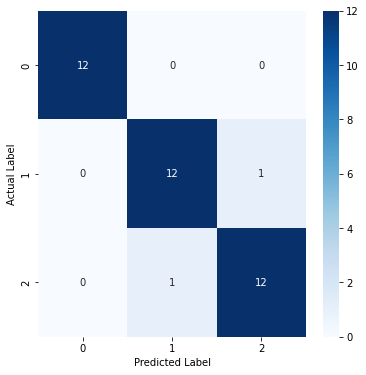

In [29]:
plt.figure(figsize = (6, 6))
CM = confusion_matrix(Y_test, Y_pred)
sns.heatmap(CM,annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [30]:
sample = np.array([[7.3,2.8,6.3, 1.8]]) 
print("The prediction is : ", int(DTC.predict(sample)))

The prediction is :  2


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


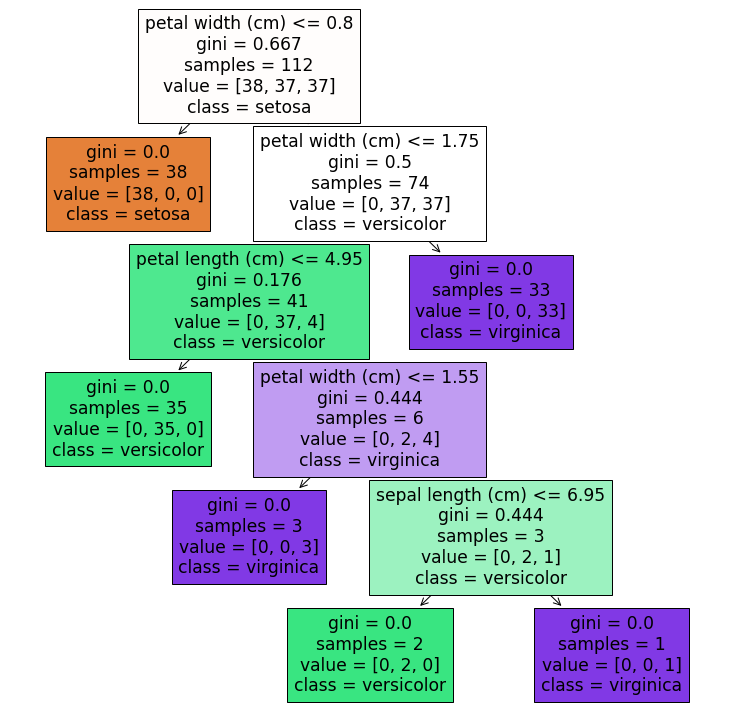

In [31]:
features =['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
species = ['setosa', 'versicolor', 'virginica']
fig = plt.figure(figsize = (13,13))
tree.plot_tree(DTC, feature_names = features, class_names = species, filled = True);